In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import random
import scipy as sp
import pulp
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import inv

In [2]:
arrived = [[17,18],[17,18]]
avoid = [[10,11,12,13,14,15,0,1,2,3,4,5,6,16,17,18,19],[10,15,3,5,6,7,8,9]]

In [3]:
def Q(s1,s,a):
    if a == "u":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] != 0 and s[1] == m-2:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.7
            elif s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.3
            else:
                return 0
        elif s[0] != 0 and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5 
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif s[0] == 0 and s[1] < m-2:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.4
            elif s1[0] == s[0] and s1[1] == s[1]+2:
                return 0.6
            else:
                return 0
        elif s[1] == m-2 and s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 1
            else:
                return 0
        elif s[1] == m-1 and s[0] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.3
            elif s1[0] == s[0] and s1[1] == s[1]+2:
                return 0.4
            elif s1[0] == s[0]-1 and s1[1] == s[1]+2:
                return 0.2
            elif s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.1
            else:
                return 0
            
    if a == "d":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        if s[0] != 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.6
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.4
            else:
                return 0
        elif s[0] == 0 and s[1] != 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]-1:
                return 0.5
            else: 
                return 0
        elif s[0] == 0 and s[1] == 0:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else: 
                return 0
        else:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0] and s1[1] == s[1]-1:
                return 0.3
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0]-1 and s1[1] == s[1]-1:
                return 0.2
            else: 
                return 0

    if a == "l":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        elif s[0] == 0 and s[1] != m-1:
            if s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif s[0] == 1 and s[1] != m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.5
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.5
            else:
                return 0
        elif (s[0] == 0) and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif (s[0] == 1) and s[1] == m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        elif s[0] > 1 and s[1] == m-1:
            if s1[0] == s[0]-1 and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0]-1 and s1[1] == s[1]+1:
                return 0.3
            elif s1[0] == s[0]-1 and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0]-2 and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0]-2 and s1[1] == s[1]+1:
                return 0.2
            else:
                return 0

    if a == "r":
        if s[0] in arrived[0] and s[1] in arrived[1]:
            if s1[0] == s[0] and s1[1] == s[0]:
                return 1
            else: 
                return 0
        if s[0] == m-1 and s[1] != m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 0.5
            elif s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.5
            else:
                return 0
        elif s[0] != m-1 and s[1] == m-1:
            if s1[0] == s[0]+1 and s1[1] == s[1]:
                return 0.7
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.3
            else:
                return 0

        elif s[0] == m-1 and s[1] == m-1:
            if s1[0] == s[0] and s1[1] == s[1]:
                return 1
            else:
                return 0
        else:
            if s1[0] == s[0]+1 and s1[1] == s[1]:
                return 0.3
            elif s1[0] == s[0]+1 and s1[1] == s[1]+1:
                return 0.4
            elif s1[0] == s[0] and s1[1] == s[1]:
                return 0.2
            elif s1[0] == s[0] and s1[1] == s[1]+1:
                return 0.1
            else:
                return 0


In [4]:
def r(s):
    r = -1
    if s[0] in avoid[0] and s[1] in avoid[1]:
        r = -1000
    elif s[0] in arrived[0] and s[1] in arrived[1]:
        r = 100
    return r

In [5]:
import cvxpy as cp
import numpy as np

In [6]:
lmbda = 0.9
m = 20
states = [(i,j) for i in range(0,m) for j in range(0,m)]
actions = ["u","d","l","r"]
alfa = np.asarray([1/(m*m) for s in states])

In [7]:
v = cp.Variable(m*m)
objective = cp.Minimize(cp.matmul(v,alfa.transpose()))

In [8]:
P = np.zeros((4,m*m,m*m))
for a in range(0,4):
    for i in range(0,m**2):
        for j in range(0,m**2):
            P[a][i][j] = lmbda*Q(states[j],states[i],actions[a])

R = np.zeros(m**2)
for i in range(m**2):
    R[i] = r(states[i])
    

In [9]:
constraints = []
for a in range(4):
    constraints.append(R<=v-cp.matmul(P[a],v))

In [10]:
prob = cp.Problem(objective,constraints)
result = prob.solve(solver='SCS',verbose=True)

                                     CVXPY                                     
                                     v1.2.1                                    
(CVXPY) Oct 27 08:59:53 PM: Your problem has 400 variables, 4 constraints, and 0 parameters.
(CVXPY) Oct 27 08:59:53 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Oct 27 08:59:53 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Oct 27 08:59:53 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Oct 27 08:59:53 PM: Compiling problem (target solver=SCS).
(CVXPY) Oct 27 08:59:53 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing ->

In [11]:
constraints[0].dual_value.size

400

In [12]:
dual = []
for i in range(0,4):
    dual.append(constraints[i].dual_value)
    

dual = np.array(dual)

In [22]:
print(dual)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.48119786e-02 3.11607266e-02 ... 0.00000000e+00
  4.69131154e-03 3.42465804e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 6.12011406e-03
  0.00000000e+00 0.00000000e+00]
 [4.17261263e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.57060776e-19 0.00000000e+00]]


In [14]:
policy = np.zeros((m*m,4))
for a in range(4):
    for i in range(m**2):
        policy[i][a] = dual[a][i]/(sum(dual[a2][i] for a2 in range(4)))

In [15]:
print(policy)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 5.47950767e-17]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00]]


In [16]:
#visualizando la politica
piMatriz = []
for i in range(m):
    lista = []
    for j in range(m):
        distr_acciones = policy[i+j*m]
        accion = actions[np.argmax(distr_acciones)]
        #print(accion)
        lista.append(accion)
    piMatriz.append(lista)

# creating df object with columns specified    
df = pd.DataFrame(piMatriz) 
print(df)

   0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19
0   r  r  r  r  r  r  r  r  u  u  u  l  l  l  l  l  l  l  l  l
1   d  d  r  r  r  r  r  r  u  u  l  l  l  l  l  l  l  l  l  l
2   d  d  d  d  d  d  d  r  u  u  l  d  d  d  d  d  d  d  d  d
3   d  d  d  d  d  r  r  r  u  u  l  l  l  d  d  d  d  d  d  d
4   d  d  d  d  d  r  r  r  u  u  l  l  l  l  l  d  d  d  d  d
5   d  d  d  d  d  r  r  r  u  u  l  l  d  d  d  d  d  d  d  d
6   u  u  u  u  u  r  r  r  u  u  l  l  l  l  u  u  u  u  u  u
7   u  u  u  u  u  u  r  r  u  u  l  l  l  u  u  u  u  u  u  u
8   u  u  u  u  u  u  r  r  u  u  l  l  u  u  u  u  u  u  u  u
9   u  u  u  u  u  u  r  r  u  u  l  u  u  u  u  u  u  u  u  u
10  u  u  u  u  u  u  u  r  u  u  u  u  u  u  u  u  u  u  u  u
11  r  r  r  r  r  r  r  r  r  u  u  u  r  r  r  r  r  u  u  u
12  d  r  r  r  r  r  r  r  r  u  u  l  l  r  r  r  r  u  u  u
13  d  d  r  r  r  r  r  r  r  u  l  l  l  r  r  r  r  r  r  l
14  d  d  d  d  d  d  d  r  r  u  l  d  d  d  d  u  u  

In [36]:
pi = {}
for i in range(m):
    for j in range(m):
        pi[(i,j)] = piMatriz[j][i]
    

In [37]:
def simulationss(pi):
    simulations = []
    for i in range(0,200):
        if i>=100:
            start = (0,0)
        else:
            start = (19,0)
        
        positions = [start]
        
        for i in range(0,100):
            decision = pi[start]
            list_of_probs = []

            for s in states:
                list_of_probs.append(Q(s,start,decision)) 
            next_start = np.random.choice([x for x in range(0,m**2)],1,p=list_of_probs)
            positions.append(states[next_start[0]])
            start=states[next_start[0]]

        simulations.append(positions)
    return simulations

simulations = simulationss(pi)


In [38]:
x = []
y = []
for positions in simulations:
    x1 = []
    y1 = []
    for tuple in positions:
        x1.append(tuple[0])
        y1.append(tuple[1])
    x.append(x1)
    y.append(y1)


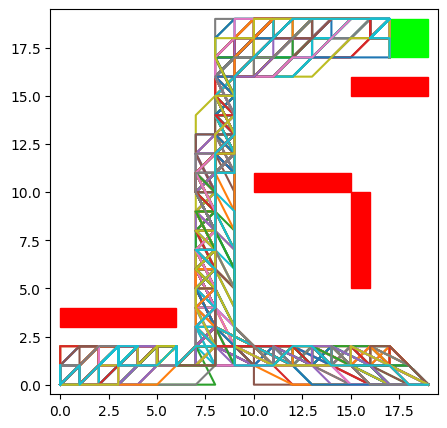

In [39]:
m = 20
fig,ax = plt.subplots()


ax.set_xlim([-0.5,m-0.5])
ax.set_ylim([-0.5,m-0.5])

'''
ax.add_patch(plt.Rectangle([10,10], 5,5,color='#FF0000'))
ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))
'''"taller2 copy.ipynb"
ax.add_patch(plt.Rectangle([10,10], 5,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([0,3], 6,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,15], 4,1,color='#FF0000'))
ax.add_patch(plt.Rectangle([15,5], 1,5,color='#FF0000'))

ax.add_patch(plt.Rectangle([17,17], 2,2,color='#00FF00'))

for i in range(0,len(x)):
    plt.plot(x[i],y[i])

fig.set_figwidth(5)
fig.set_figheight(5)
plt.show()